# Análise Exploratória

Base Dados disponível em: https://ourworldindata.org/covid-deaths.

Essa base de dados contém Informações sobre a COVID-19 em todos os países e continentes. 

Período utilizado para a análise: 1/1/2020 até 23/06/2022.

# Perguntas

1- Qual o número total de mortes e casos no mundo?

2- Compare o desempenho na vacinação, a taxa de infecção e o percentual de mortes entre os continentes.

3- Quais os países com as maiores as taxas de mortes por população? E em número mortes?

4- Quais os países com as maiores taxas de infecção? E os com as menores?

5- Há algum país com a população totalmente vacinada? Quais?

6- Taxa de infecção no Brasil.

7- Vacinação no Brasil.

8- Evolução do número de óbitos diários por Covid no Brasil.

9- Qual o desempenho do Brasil na vancinação em relação a países do G7?

10- Percentual de mortes no Brasil comparado a países do G7.







In [1]:
import sqlite3
import os
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
mlp.style.use(style='ggplot')
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [2]:
# Função para retornar as consultas SQL.
def sql_query(query):
    try:
        df = pd.read_sql(query, conn)
        if 'date' in df.columns.to_list():
            df['date'] = pd.to_datetime(df['date'])
    except Exception as E:
        print(E)
    return df 

In [3]:
conn = sqlite3.connect('data\COVID.db')

In [4]:
curso = conn.cursor()

In [5]:
# Checando o Nome das Tabelas no banco de dados
curso.execute("""SELECT name FROM sqlite_schema WHERE name NOT LIKE '%_index'""")
dados = curso.fetchall()
print(dados)

[('CovidDeaths',), ('CovidVac',)]


conn.close()

### Visualizando as Tabelas do Banco de Dados

In [6]:
consulta = """SELECT * FROM CovidDeaths 
              ORDER BY 3, 4 
              LIMIT 5
              """
sql_query(consulta)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,"39,835,428.000",5.000,5.000,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,AFG,Asia,Afghanistan,2020-02-25,"39,835,428.000",5.000,0.000,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,AFG,Asia,Afghanistan,2020-02-26,"39,835,428.000",5.000,0.000,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,AFG,Asia,Afghanistan,2020-02-27,"39,835,428.000",5.000,0.000,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,AFG,Asia,Afghanistan,2020-02-28,"39,835,428.000",5.000,0.000,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
consulta = """SELECT  * FROM CovidVac
              ORDER BY 3, 4
              LIMIT 10;
              """
sql_query(consulta)


,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
1,AFG,Asia,Afghanistan,2020-02-25,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
2,AFG,Asia,Afghanistan,2020-02-26,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
3,AFG,Asia,Afghanistan,2020-02-27,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
4,AFG,Asia,Afghanistan,2020-02-28,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
5,AFG,Asia,Afghanistan,2020-02-29,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
6,AFG,Asia,Afghanistan,2020-03-01,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
7,AFG,Asia,Afghanistan,2020-03-02,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
8,AFG,Asia,Afghanistan,2020-03-03,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None
9,AFG,Asia,Afghanistan,2020-03-04,None,None,None,None,None,None,...,None,None,37.746,0.500,64.830,0.511,None,None,None,None


#### 1- Qual o número total de mortes e casos no mundo?

In [8]:
consulta = """SELECT SUM(new_cases) as total_cases, SUM(CAST(new_deaths as int)) as total_deaths, (SUM(CAST(new_deaths as int))/SUM(new_cases))*100 as death_percent
              FROM CovidDeaths
              WHERE continent is not null
              order by 1, 2"""
sql_query(consulta)

,total_cases,total_deaths,death_percent
0,"541,009,965.000",6283842,1.162


#### 2- Compare o desempenho na vacinação, a taxa de infecção e o percentual de mortes entre os continentes.


In [9]:
# Continentes com o Maior Número de Mortes por População

In [10]:
consulta = """SELECT continent, MAX(CAST(total_deaths as int)) as total_death_count, MAX(CAST(total_deaths as int)/population)*100 as percent_deaths
              FROM CovidDeaths
              WHERE continent is not null
              GROUP BY continent
              ORDER BY percent_deaths DESC"""
sql_query(consulta)

,continent,total_death_count,percent_deaths
0,North America,1015342,0.305
1,South America,669895,0.640
2,Asia,524954,0.423
3,Europe,373010,0.540
4,Africa,101704,0.240
5,Oceania,9603,0.230


Até o momento, o continente com maior número de mortes é a América do Norte seguido da América do Sul.  Quanto ao percentual da população que morreu de Covid-19, a América do Sul está no topo seguida pela Europa.

In [11]:
consulta = """SELECT CD.location, CD.date, STRFTIME('%Y-%W',CD.date) as week_year, STRFTIME('%Y-%m', CD.date) as month_year,
                     CD.population, CV.new_vaccinations, (people_vaccinated/population)*100 as people_vaccinated_per_hundred, people_fully_vaccinated, people_fully_vaccinated_per_hundred,
                     total_deaths, (total_deaths/total_cases)*100 AS death_percentage, ROUND(total_deaths/population*100, 2) AS percentual_infected_population
              FROM CovidDeaths CD
              JOIN CovidVac CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE CD.continent is null AND CD.location in ('Africa', 'Europe', 'South America', 'Asia', 'North America', 'Oceania')
              ORDER BY 2, 1
              """
df = sql_query(consulta).dropna()

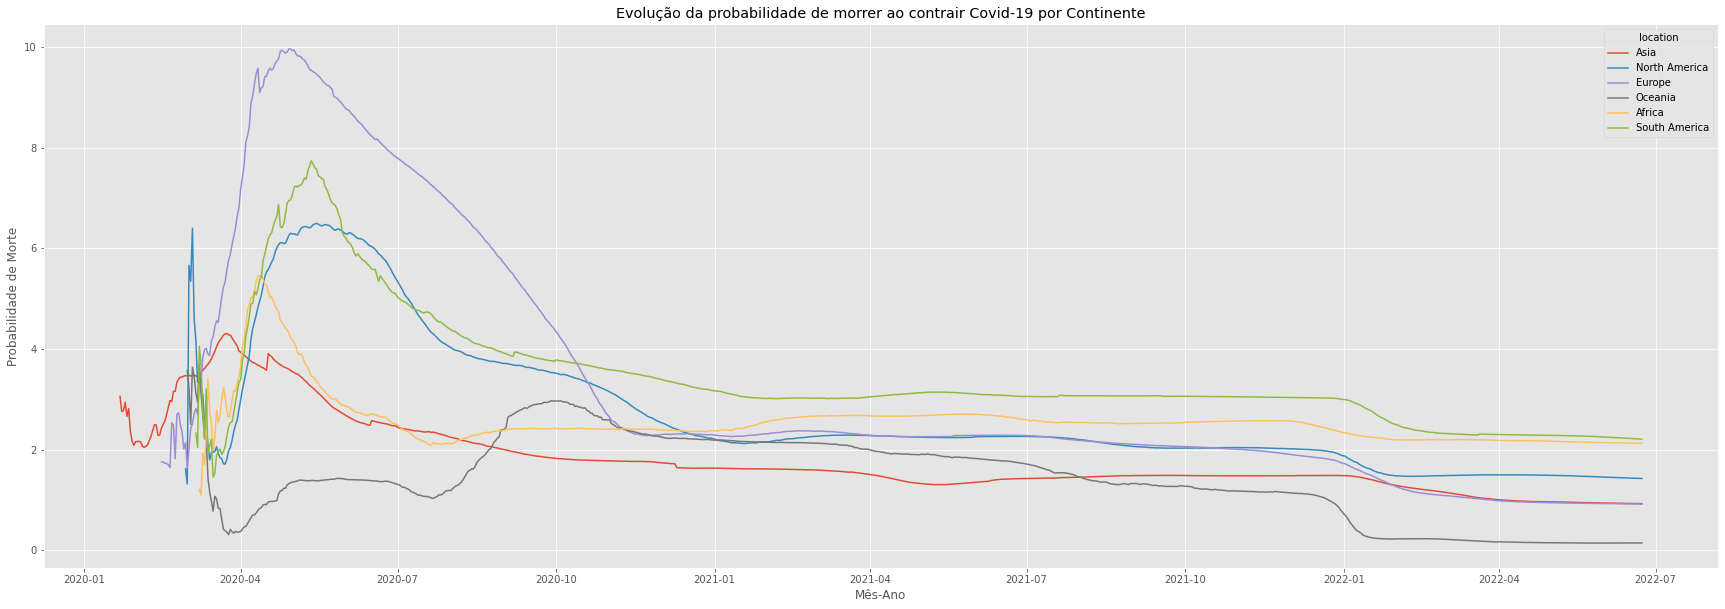

In [12]:
plt.figure(figsize=(30,10))
sns.lineplot(x='date', y='death_percentage', hue='location', data=sql_query(consulta), estimator=None)
plt.title('Evolução da probabilidade de morrer ao contrair Covid-19 por Continente')
plt.xlabel('Mês-Ano')
plt.ylabel('Probabilidade de Morte')
plt.show()

No ínicio da pandemia, a Europa, América do Sul e América do Norte estavam com as maiores taxas de mortes por população, respectivamente. Autalmente a América do Sul está no topo e em segundo lugar a África.

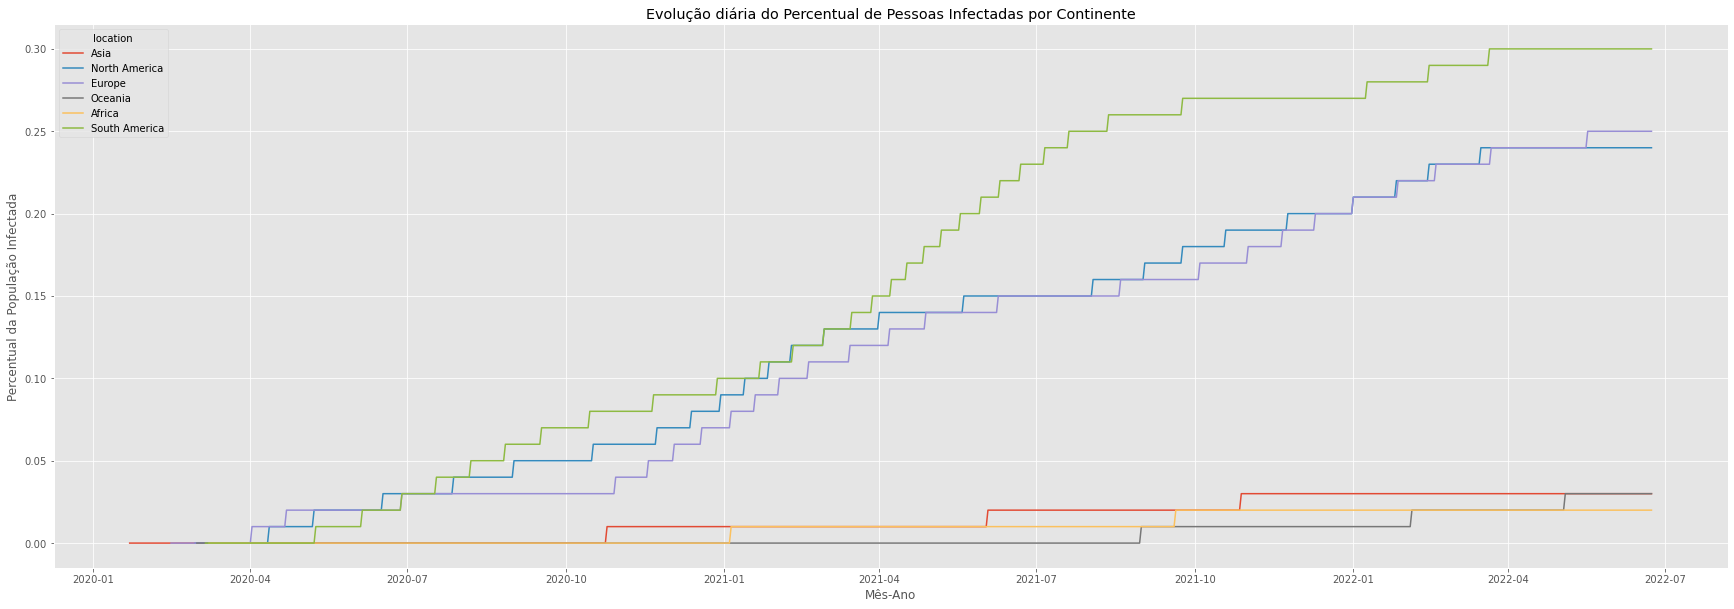

In [13]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='date', y='percentual_infected_population', hue='location', data=sql_query(consulta))
plt.title('Evolução diária do Percentual de Pessoas Infectadas por Continente')
plt.xlabel('Mês-Ano')
plt.ylabel('Percentual da População Infectada')
plt.show()

Três continentes — Ásia, África e Oceanina — mantiveram, durante o período de pandemia, uma baixa taxa de infecção. Equanto América do Norte, América do Sul e Europa não mativeram a taxa de infecção controlada como os outros continentes.

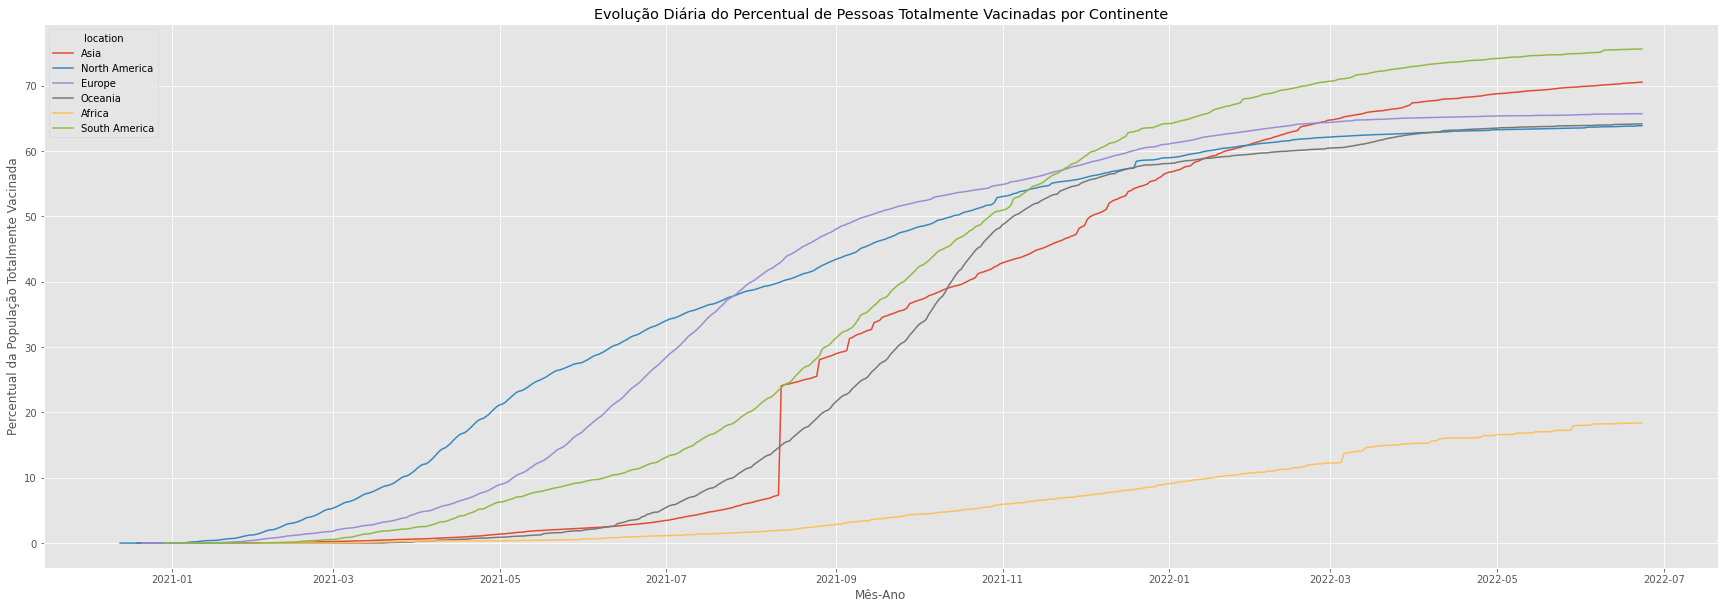

In [14]:
plt.figure(figsize=(30,10))
sns.lineplot(x='date', y='people_fully_vaccinated_per_hundred', hue='location', data=sql_query(consulta))
plt.title('Evolução Diária do Percentual de Pessoas Totalmente Vacinadas por Continente')
plt.xlabel('Mês-Ano')
plt.ylabel('Percentual da População Totalmente Vacinada')
plt.show()

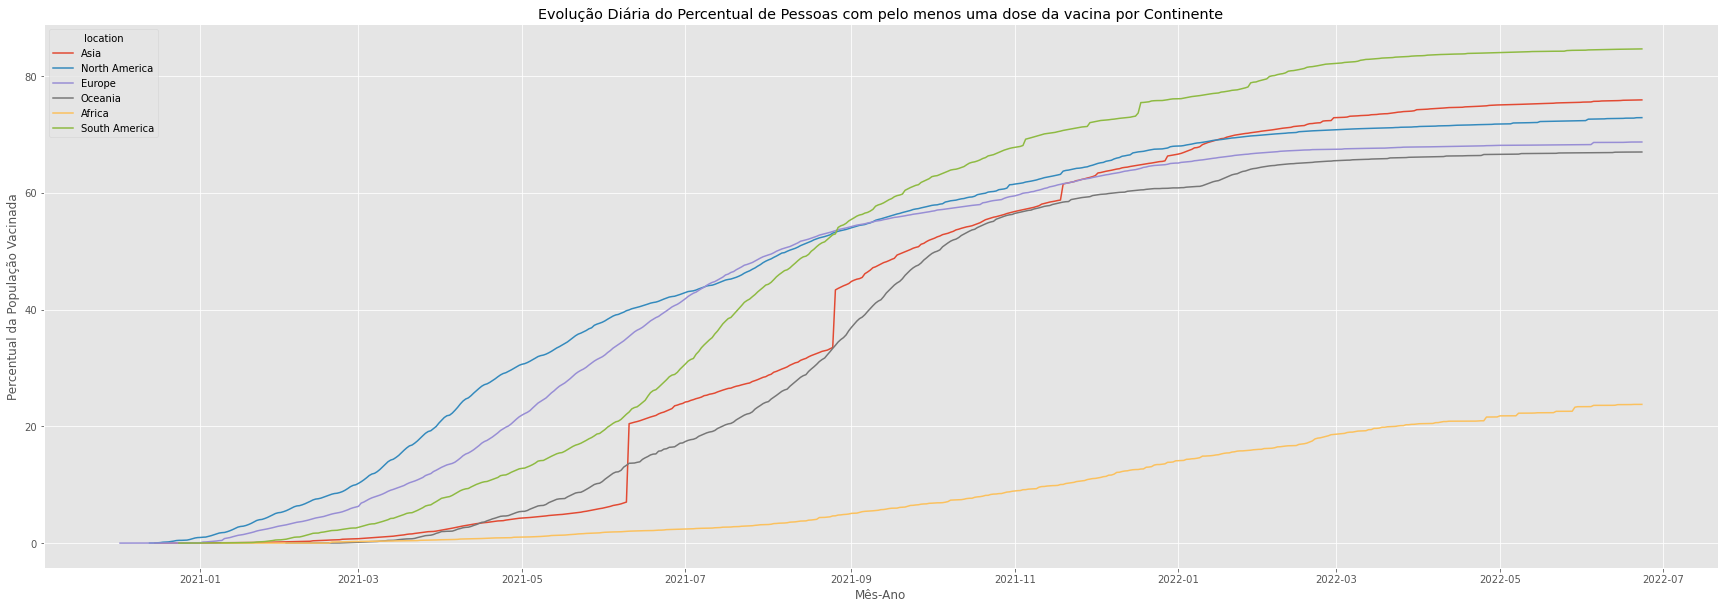

In [15]:
plt.figure(figsize=(30,10))
sns.lineplot(x='date', y='people_vaccinated_per_hundred', hue='location', data=sql_query(consulta))
plt.title('Evolução Diária do Percentual de Pessoas com pelo menos uma dose da vacina por Continente')
plt.xlabel('Mês-Ano')
plt.ylabel('Percentual da População Vacinada')
plt.show()

A América do sul iniciou a vacinação um pouco depois da América do Norte e da Europa, mas, atualmente, é o continente com o maior percentual de população vacinada.

A África é o continente com pior desempenho na vacinação, menos de 30% da população vacinada. Enquato os outros continentes estão com mais de 60%.

#### 3- Quais os países com as maiores taxas de mortes por população? E em número absoluto?

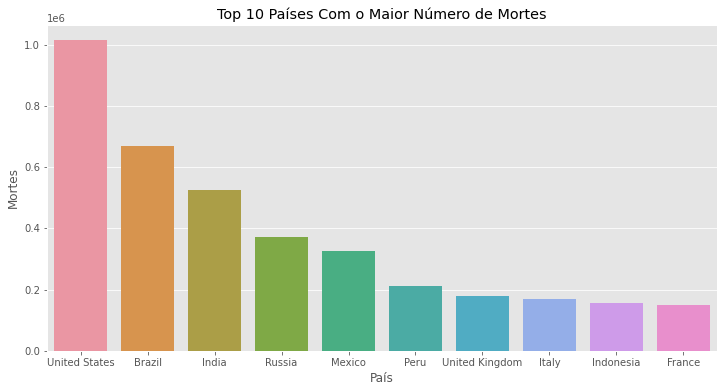

In [16]:
consulta = """SELECT location, MAX(total_deaths) as deaths
              FROM CovidDeaths
              WHERE continent IS NOT NULL
              GROUP BY location
              ORDER BY deaths DESC
              LIMIT 10"""

plt.figure(figsize=(12,6))
sns.barplot(x='location', y='deaths', data=sql_query(consulta))
plt.title('Top 10 Países Com o Maior Número de Mortes')
plt.xlabel('País')
plt.ylabel('Mortes')
plt.show()

In [17]:
consulta = """SELECT location, population, ROUND(MAX(total_deaths)/population*100, 2) as death_percent
              FROM CovidDeaths
              WHERE continent IS NOT NULL
              GROUP BY location
              ORDER BY death_percent DESC
              LIMIT 10"""
sql_query(consulta)


,location,population,death_percent
0,Peru,"33,359,415.000",0.640
1,Bulgaria,"6,896,655.000",0.540
2,Hungary,"9,634,162.000",0.480
3,Bosnia and Herzegovina,"3,263,459.000",0.480
4,North Macedonia,"2,082,661.000",0.450
5,Montenegro,"628,051.000",0.430
6,Georgia,"3,979,773.000",0.420
7,Croatia,"4,081,657.000",0.390
8,Czechia,"10,724,553.000",0.380
9,Slovakia,"5,449,270.000",0.370


Os países com o maior número de mortes por Covid são Estados Unidos, Brasil e Índia respectivamente.

Em relação a proporção de número de mortes por população, o Peru aparece em primeiro lugar seguido de Bulgária e Hungria.

Vale notar que o Peru é o único país presente no top 10 de número de mortes e mortes/população.

#### 4- Quais os países com as maiores taxas de infecção? E os com as menores?

In [18]:
consulta = """SELECT CD.continent, CD.location, population, MAX(total_cases) as cases, round(MAX(total_cases)/population*100, 2) as percentual_infected_population
              FROM CovidDeaths CD
              JOIN CovidVac CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE CD.continent IS NOT NULL
              GROUP BY CD.location
              ORDER BY percentual_infected_population DESC
              LIMIT 10"""
sql_query(consulta)

,continent,location,population,total_tests,cases,percentual_infected_population
0,Europe,Faeroe Islands,"49,053.000","777,845.000","34,658.000",70.650
1,Europe,Gibraltar,"33,691.000","533,268.000","19,306.000",57.300
2,Europe,Andorra,"77,354.000","300,307.000","43,774.000",56.590
3,Europe,Cyprus,"896,005.000","29,501,771.000","497,454.000",55.520
4,Europe,Denmark,"5,813,302.000","64,649,913.000","3,159,696.000",54.350
5,Europe,Iceland,"368,792.000","1,373,785.000","192,031.000",52.070
6,Europe,San Marino,"34,010.000",NaN,"17,631.000",51.840
7,South America,Falkland Islands,"3,528.000",NaN,"1,807.000",51.220
8,Europe,Portugal,"10,167,923.000","42,825,431.000","5,109,412.000",50.250
9,Europe,Slovenia,"2,078,723.000","5,336,373.000","1,033,524.000",49.720


A maioria dos países com os maiores percentuais de população infectada são países pequenos com menos de 1 milhão de habitantes, tais como: Ilhas Faroé, Gibraltar e Andorra.

In [23]:
consulta = """SELECT CD.continent, CD.location, population, MAX(total_cases) as cases, round(MAX(total_cases)/population*100, 2) as percentual_infected_population
              FROM CovidDeaths CD
              JOIN CovidVac CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE CD.continent IS NOT NULL AND total_cases IS NOT NULL
              GROUP BY CD.location
              ORDER BY percentual_infected_population ASC
              LIMIT 10"""
sql_query(consulta)

,continent,location,population,cases,percentual_infected_population
0,Asia,North Korea,"25,887,045.000",1.000,0.000
1,Asia,Macao,"658,391.000",115.000,0.020
2,Oceania,Marshall Islands,"59,618.000",18.000,0.030
3,Oceania,Micronesia (country),"116,255.000",38.000,0.030
4,Africa,Chad,"16,914,985.000","7,424.000",0.040
5,Africa,Niger,"25,130,810.000","9,031.000",0.040
6,Asia,Yemen,"30,490,639.000","11,824.000",0.040
7,Asia,China,"1,444,216,102.000","887,848.000",0.060
8,Africa,Tanzania,"61,498,438.000","35,366.000",0.060
9,Africa,Saint Helena,"6,095.000",4.000,0.070


A maioria entre os 10 países com os menores percentuais de população infectada são da Ásia ou África. 

Na Coréia do Norte há apenas um caso registrado, mas por ser um país fechado não é possível ter certeza que esse valor está correto.

#### 5- Há algum país com a população totalmente vacinada? Quais?

In [24]:
consulta = """SELECT CD.continent, CD.location, CD.population, MAX(CV.people_fully_vaccinated)/population*100 as percent_population_fully_vaccinated
              FROM CovidDeaths CD
              JOIN CovidVAc CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE CD.continent IS NOT NULL
              GROUP BY CD.location
              ORDER BY percent_population_fully_vaccinated DESC
              LIMIT 10"""
sql_query(consulta)

,continent,location,population,percent_population_fully_vaccinated
0,Europe,Gibraltar,"33,691.000",122.944
1,Oceania,Pitcairn,47.000,100.000
2,Oceania,Samoa,"200,144.000",99.003
3,Asia,United Arab Emirates,"9,991,083.000",98.010
4,Asia,Brunei,"441,532.000",96.655
5,Asia,Singapore,"5,453,600.000",91.593
6,South America,Chile,"19,212,362.000",91.446
7,Europe,Malta,"516,100.000",91.005
8,Oceania,Tonga,"106,759.000",91.000
9,Asia,Qatar,"2,930,524.000",90.202


Apenas Gibraltar e Pitcaim estão com a população completamente vacinadas. Gibraltar aparece com 122% da população vacinada, a razão disso é que turistas estão sendo vacinados no país. 

# Brasil

#### 6- Taxa de infecção no Brasil.

In [101]:
# Total de casos x Total de mortes no Brasil
consulta =  """SELECT location, population, total_cases, total_deaths,
                       round(MAX(total_cases)/population*100, 2) as percentual_infected_population,
                       MAX(total_deaths)/MAX(total_cases)*100 AS death_probability
                       
              FROM CovidDeaths CD
              WHERE LOWER(location) like '%brazil%'
              AND continent IS NOT NULL
              GROUP BY location
              ORDER BY 1, 2"""

sql_query(consulta).T

,0
location,Brazil
population,"213,993,441.000"
total_cases,"31,962,782.000"
total_deaths,"669,895.000"
percentual_infected_population,14.940
death_probability,2.096


Até o momento 14.94% da população brasileira foi infectada pelo vírus.

#### 7- Vacinação no Brasil.

In [102]:
consulta = """SELECT CD.location, 
                     CD.population, CV.total_vaccinations, CV.people_vaccinated, MAX(people_vaccinated)/population*100 as percent_population_vaccinated, 
                     people_fully_vaccinated, people_fully_vaccinated_per_hundred
                     
              FROM CovidDeaths CD
              JOIN CovidVac CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE LOWER(CD.location) LIKE '%Brazil'
              GROUP BY CD.location
              ORDER BY 1, 2
              """
sql_query(consulta).T

,0
location,Brazil
population,"213,993,441.000"
total_vaccinations,"451,276,207.000"
people_vaccinated,"184,537,975.000"
percent_population_vaccinated,86.235
people_fully_vaccinated,"168,547,546.000"
people_fully_vaccinated_per_hundred,78.760


No Brasil, 86,24% da população está vacinada com pelo menos uma dose; e 78,76% da populção está totalmente vacinada (pelo menos duas doses).

#### 8- Evolução do número de óbitos diários por Covid no Brasil.

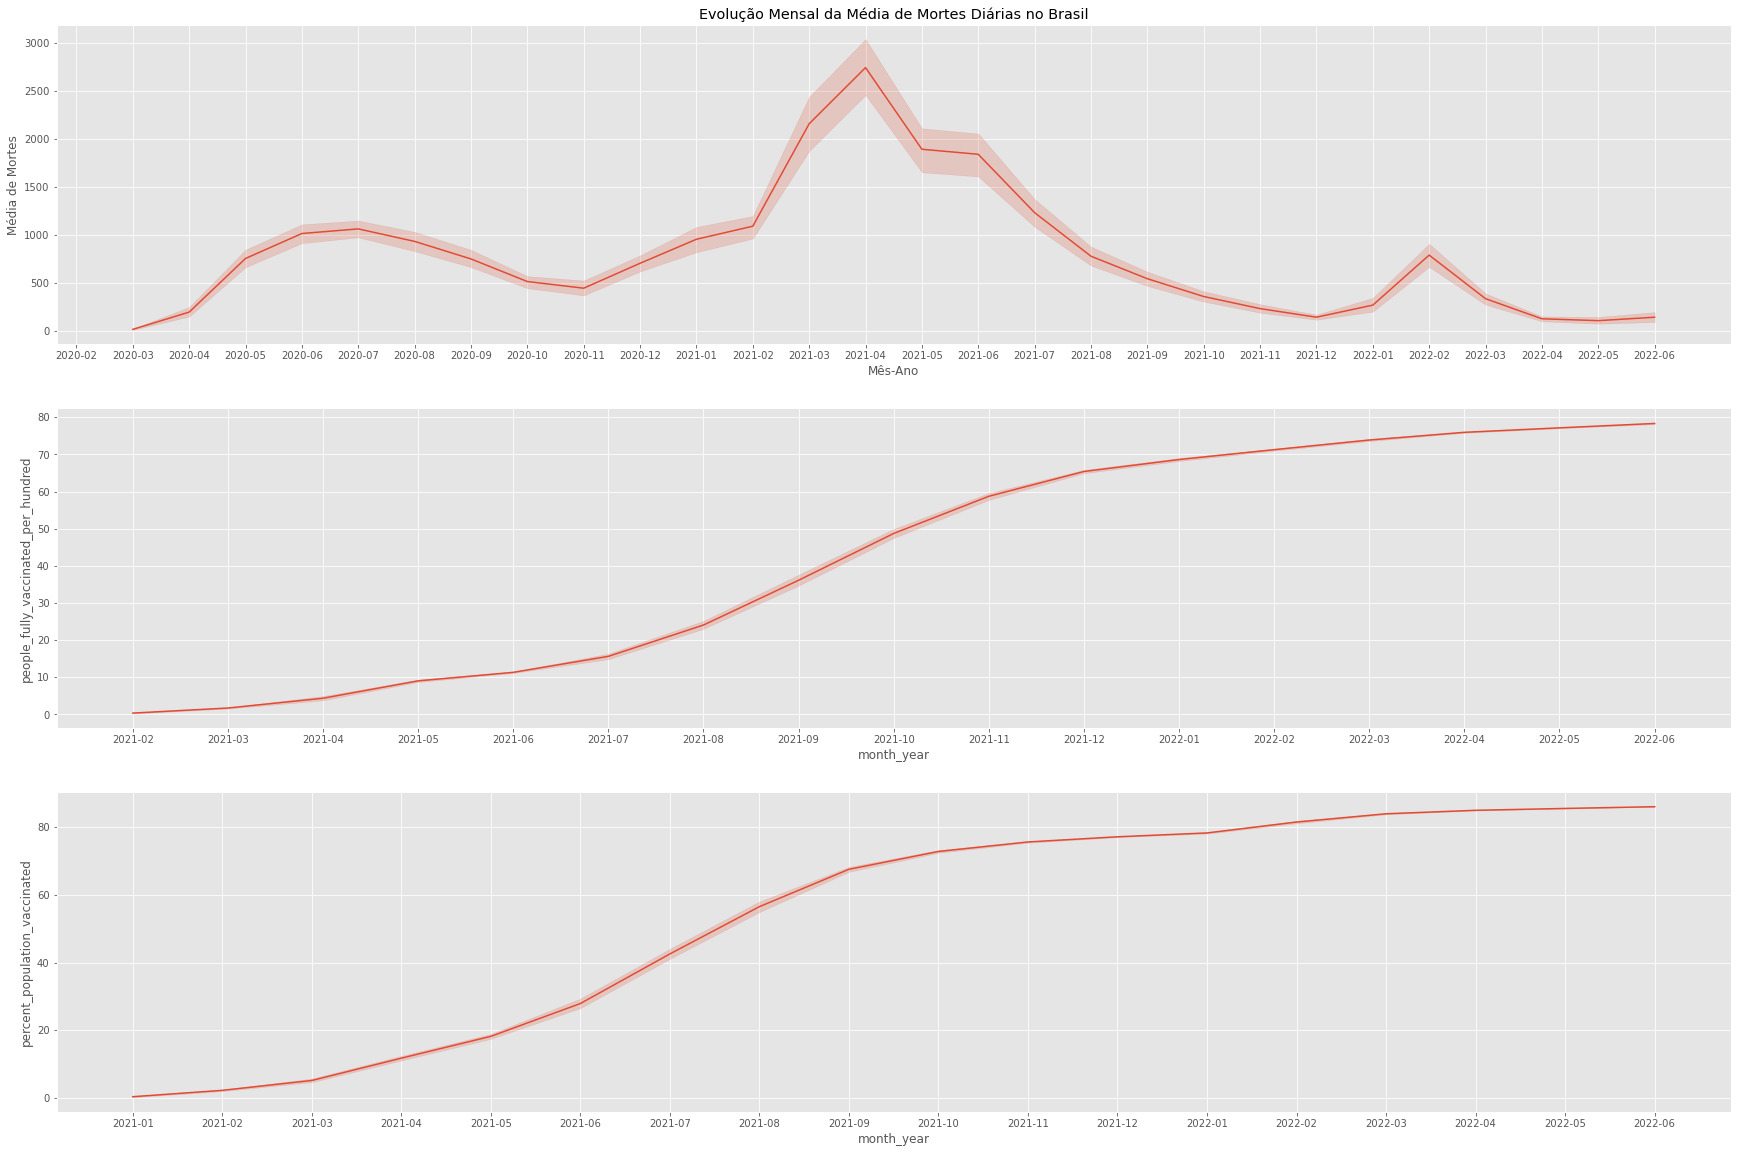

In [103]:
consulta = """SELECT CD.location, CD.date, STRFTIME('%Y-%W',CD.date) as week_year, STRFTIME('%Y-%m', CD.date) as month_year, 
                     CD.population, CV.new_vaccinations, (people_vaccinated/population)*100 as percent_population_vaccinated, people_fully_vaccinated, people_fully_vaccinated_per_hundred,
                     new_deaths
              FROM CovidDeaths CD
              JOIN CovidVac CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE LOWER(CD.location) LIKE '%Brazil'
              ORDER BY 1,2
              """

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(30,20))

sns.lineplot(x='month_year', y='new_deaths', data=sql_query(consulta), ax=ax[0])

ax[0].set_title('Evolução Mensal da Média de Mortes Diárias no Brasil')
ax[0].set_xlabel('Mês-Ano')
ax[0].set_ylabel('Média de Mortes')

sns.lineplot(x='month_year', y='people_fully_vaccinated_per_hundred', data=sql_query(consulta), ax=ax[1])

ax[1].set_title('Evolução do Percentual de Pessoas Totalmente Vacinadas no Brasil')
ax[1].set_xlabel('Mês-Ano')
ax[1].set_ylabel('Percentual da População Totalmente Vacinada')

sns.lineplot(x='month_year', y='percent_population_vaccinated', data=sql_query(consulta), ax=ax[2])

ax[2].set_title('Evolução do Percentual de Pessoas Vacinadas no Brasil')
ax[2].set_xlabel('Mês-Ano')
ax[2].set_ylabel('Percentual da População Vacinanda')

plt.show()


O pior momento da pandemia, no Brasil, foi em Abril de 2021 em que a média de mortes diárias estava próxima a 3 mil. Nessa época a vacinação já havia começado, mas menos de 20% da população estava vacinada com pelo menos uma dose.  Depois desse período, houve uma grande queda na média de mortes diárias — abaixo de quinhentos no final de 2021 — com o avanço da vacinação.

Um ponto curioso é que mesmo com 70% da população totalmente vacinada — com duas ou mais doses da vacina — a média de mortes diária voltou a subir em fevereiro de 2022 chegando a quase mil mortes de média.


#### 9- Qual o desempenho do Brasil na vacinação em relação a países do G7?

In [104]:
# Selecionando Colunas
consulta = """SELECT CD.location, CD.date, STRFTIME('%Y-%W',CD.date) as week_year, STRFTIME('%Y-%m', CD.date) as month_year, 
                     CD.population, CV.new_vaccinations, people_vaccinated, people_fully_vaccinated, people_fully_vaccinated_per_hundred, 
                     (total_deaths/total_cases)*100 AS death_percentage,  (people_vaccinated/population)*100 as percent_population_vaccinated
              FROM CovidDeaths CD
              JOIN CovidVac CV
                  ON CD.location = CV.location
                  AND CD.date = CV.date
              WHERE CD.location in ('Brazil', 'Germany', 'France', 'Canada', 'United Kingdom', 'Italy', 'United States', 'Japan')
              ORDER BY 1,2
              """
brasil_vac = sql_query(consulta)

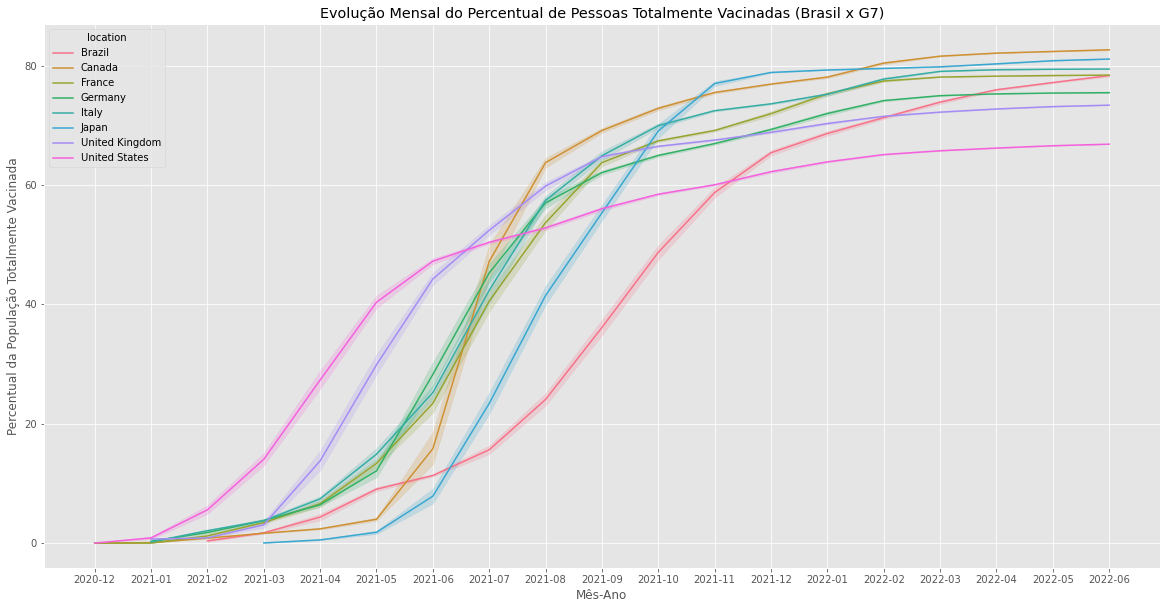

In [105]:
plt.figure(figsize=(20,10))
sns.lineplot(x='month_year', y='people_fully_vaccinated_per_hundred', hue='location', data=brasil_vac)
plt.title('Evolução Mensal do Percentual de Pessoas Totalmente Vacinadas (Brasil x G7)')
plt.xlabel('Mês-Ano')
plt.ylabel('Percentual da População Totalmente Vacinada')
plt.show()

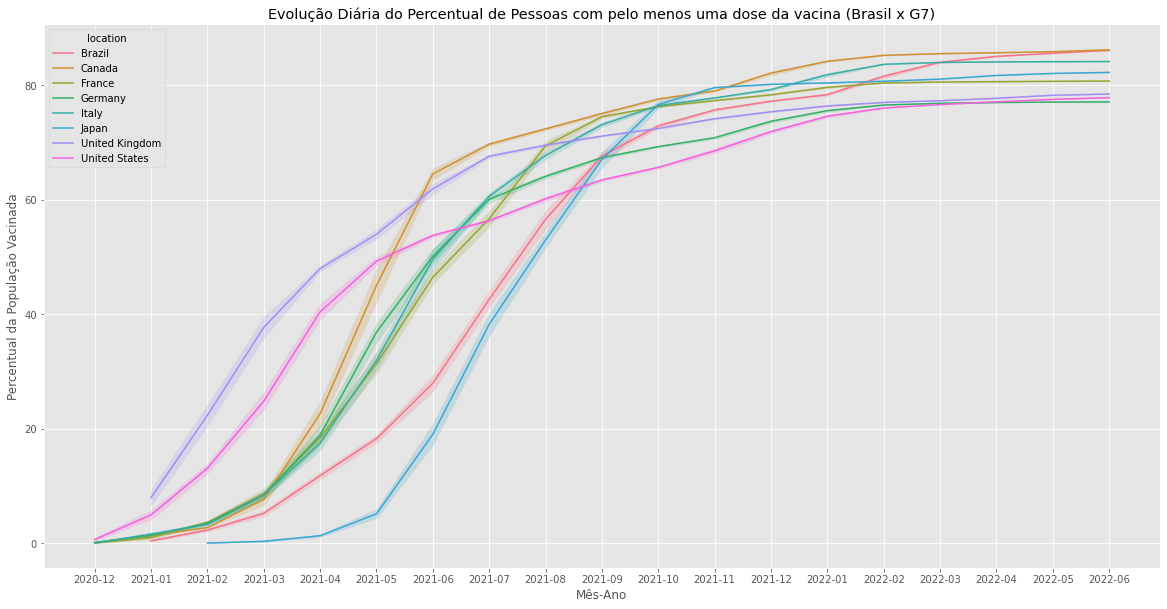

In [106]:
plt.figure(figsize=(20,10))
sns.lineplot(x='month_year', y='percent_population_vaccinated', hue='location', data=brasil_vac)
plt.title('Evolução Diária do Percentual de Pessoas com pelo menos uma dose da vacina (Brasil x G7)')
plt.xlabel('Mês-Ano')
plt.ylabel('Percentual da População Vacinada')
plt.show()

Dentre os países do G7, apenas o Japão inciou a vacinação após o Brasil. Mas hoje o Brasil está a frente, em termos de percentual de população vacinada com ao menos uma dose, de todos os países do G7 exceto Canadá.

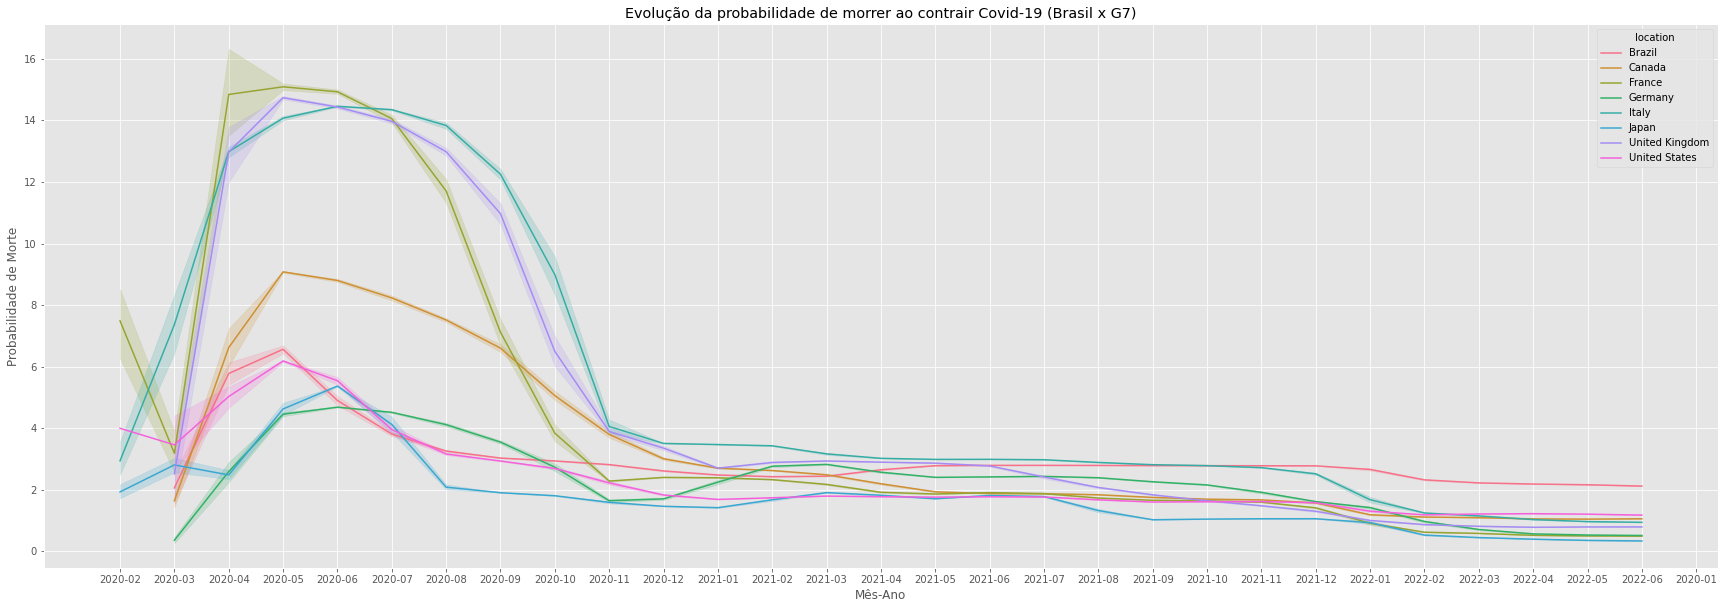

In [107]:
plt.figure(figsize=(30,10))
sns.lineplot(x='month_year', y='death_percentage', hue='location', data=brasil_vac)
plt.title('Evolução da probabilidade de morrer ao contrair Covid-19 (Brasil x G7)')
plt.xlabel('Mês-Ano')
plt.ylabel('Probabilidade de Morte')
plt.show()

No ínicio da pandemia, França, Reino Unido e Itália foram os que tiveram as maiores taxas de mortes por casos de Covid-19. Durante boa parte da pandemia, o Brasil se manteve no centro em relação aos países do G7, mas atualmente é o país com a maior taxa de mortes por casos de Covid.

#### 10- Percentual de mortes no Brasil comparado a paises do G7.


In [108]:
consulta = """SELECT location, ROUND(MAX(total_deaths)/population*100, 2) as death_percent
              FROM CovidDeaths
              WHERE continent IS NOT NULL AND location IN ('Brazil', 'Germany', 'France', 'Canada', 'United Kingdom', 'Italy', 'United States', 'Japan')
              GROUP BY location
              ORDER BY death_percent DESC
              LIMIT 10"""
sql_query(consulta)

,location,death_percent
0,Brazil,0.310
1,United States,0.300
2,Italy,0.280
3,United Kingdom,0.260
4,France,0.220
5,Germany,0.170
6,Canada,0.110
7,Japan,0.020


In [110]:

conn.close()